Exercise 2
==========

In [1]:
import numpy
import re
from matplotlib import pyplot
from IPython.display import Latex, Math, display
% matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.split(os.path.split(os.getcwd())[0])[0])

In [3]:
import utils.quadrature as quad
import utils.poly as poly

## (a)

Let $f(x)=x^7$. Evaluate the derivative matrix and the derivatives at quadrature points using Gauss-Lobatto-Legendre quadrature with $Q=7,\ 8,\ 9$.

In [4]:
def f_ex2a(x):
    """f = x^7"""
    
    return x**7

def df_ex2a(x):
    """df/dx = 7 * (x**6)"""
    
    return 7 * (x**6)

In [5]:
def ex2a(Qi, f, df):
    """a wrapper for generating solutions"""
    
    numpy.set_printoptions(
        formatter={'float': "{:5.2e}".format}, linewidth=120)
    
    qd = quad.GaussLobattoJacobi(Qi)
    p = poly.LagrangeBasis(qd.nodes)
    D = p.derivative(qd.nodes)
    ans = D.dot(f(qd.nodes))
    exact = df(qd.nodes)
    err = numpy.abs(ans - exact)
    
    def generateLatex(A):
        return "{\\scriptsize \\left[\\begin{array}{r}" + \
                re.sub(r"[ ]+", "&", re.sub(r"\n[ ]*", "\\\\\\\\", 
                re.sub(r"\][ ]*", "", re.sub(r"\[[ ]*", "", str(A))))) + \
               "\\end{array}\\right]}"
            
    display(Latex("For " + "$Q={0}$".format(Qi) + ":"))
    display(Latex("$\qquad$The derivative matrix is: "))
    display(Math("\\qquad" + generateLatex(D)))
    display(Latex("$\\qquad$The derivatives at quadrature points are: "))
    display(Math("\\qquad" + generateLatex(ans)))
    display(Latex("$\\qquad$The exact derivatives at quadrature points are: "))
    display(Math("\\qquad" + generateLatex(exact)))
    display(Latex("$\\qquad$The absolute errors are: "))
    display(Math("\\qquad" + generateLatex(err)))

In [6]:
for Qi in [7, 8, 9]:
    ex2a(Qi, f_ex2a, df_ex2a)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

## (b)

The same problem with exercise 2a, except that now the interval on which we apply quadrature is $x \in [2,\ 10]$. Use chain rule to evaluate the derivative at mapped quadrature points.

In [7]:
def ex2b(Qi, f, df):
    """a wrapper for generating solutions"""
    
    numpy.set_printoptions(
        formatter={'float': "{:5.2e}".format}, linewidth=120)
    
    x = lambda xi: (xi + 1) * (10 - 2) / 2. + 2
    dxi_dx = 2. / (10 - 2)
    qd = quad.GaussLobattoJacobi(Qi)
    p = poly.LagrangeBasis(qd.nodes)
    D = p.derivative(qd.nodes)
    ans = D.dot(f(x(qd.nodes))) * dxi_dx
    exact = df(x(qd.nodes))
    err = numpy.abs(ans - exact)
    
    def generateLatex(A):
        return "{\\scriptsize \\left[\\begin{array}{r}" + \
                re.sub(r"[ ]+", "&", re.sub(r"\n[ ]*", "\\\\\\\\", 
                re.sub(r"\][ ]*", "", re.sub(r"\[[ ]*", "", str(A))))) + \
               "\\end{array}\\right]}"
            
    display(Latex("For " + "$Q={0}$".format(Qi) + ":"))
    display(Latex("$\\qquad$The derivatives at quadrature points are: "))
    display(Math("\\qquad" + generateLatex(ans)))
    display(Latex("$\\qquad$The exact derivatives at quadrature points are: "))
    display(Math("\\qquad" + generateLatex(exact)))
    display(Latex("$\\qquad$The absolute errors are: "))
    display(Math("\\qquad" + generateLatex(err)))

In [8]:
for Qi in [7, 8, 9]:
    ex2b(Qi, f_ex2a, df_ex2a)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

## (c)

Use the differentiation techniques to numerically integrate $-\int_{0}^{\pi/2}\frac{d}{dx}\cos{(x)}dx$. Plot the error with respect to number of quadrature points, $Q$. Use $2 \le Q \le 8$.

In [9]:
def f_ex2c(x):
    """integrand of exercise 1c"""
    
    return - numpy.cos(x)

In [10]:
def ex2c(Qi, f):
    """a wrapper for generating solutions"""
    
    x = lambda xi: (xi + 1) * (numpy.pi / 2. - 0.) / 2. + 0.
    dxi_dx = 2. / (numpy.pi / 2. - 0.)
    dx_dxi = (numpy.pi / 2. - 0.) / 2.
    qd = quad.GaussLobattoJacobi(Qi)
    p = poly.LagrangeBasis(qd.nodes)
    d = p.derivative(qd.nodes).dot(f(x(qd.nodes))) * dxi_dx
    ans = numpy.sum(d * qd.weights * dx_dxi)
    err = numpy.abs(ans - 1.)
    
    print("The numerical solution is: " +
          "{0}; the absolute error is: {1}".format(ans, err))
    
    return err

In [11]:
Q = numpy.arange(2, 9)
err = numpy.zeros_like(Q, dtype=numpy.float64)
for i, Qi in enumerate(range(2, 9)):
    err[i] = ex2c(Qi, f_ex2c)

The numerical solution is: 0.9999999999999999; the absolute error is: 1.1102230246251565e-16
The numerical solution is: 0.9999999999999998; the absolute error is: 2.220446049250313e-16
The numerical solution is: 0.9999999999999998; the absolute error is: 2.220446049250313e-16
The numerical solution is: 0.999999999999999; the absolute error is: 9.992007221626409e-16
The numerical solution is: 0.9999999999999994; the absolute error is: 5.551115123125783e-16
The numerical solution is: 1.0000000000000018; the absolute error is: 1.7763568394002505e-15
The numerical solution is: 1.0000000000000195; the absolute error is: 1.9539925233402755e-14


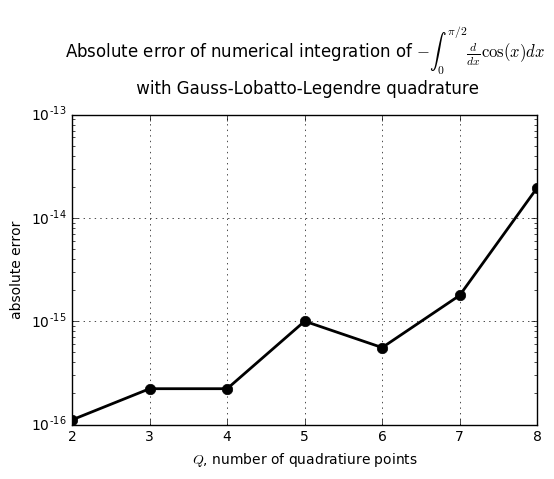

In [12]:
pyplot.semilogy(Q, err, 'k.-', lw=2, markersize=15)
pyplot.title("Absolute error of numerical integration of " +
             r"$-\int_{0}^{\pi/2}\frac{d}{dx}\cos{(x)} dx$" + 
             "\n with Gauss-Lobatto-Legendre quadrature", y=1.08)
pyplot.xlabel(r"$Q$" + ", number of quadratiure points")
pyplot.ylabel("absolute error")
pyplot.grid();

In [13]:
def df_ex2c(x):
    """derivative of f"""
    
    return numpy.sin(x)

In [14]:
def ex2c_mod(Qi, f, df):
    """a wrapper for generating solutions"""
    
    x = lambda xi: (xi + 1) * (numpy.pi / 2. - 0.) / 2. + 0.
    dxi_dx = 2. / (numpy.pi / 2. - 0.)
    dx_dxi = (numpy.pi / 2. - 0.) / 2.
    
    qd = quad.GaussLobattoJacobi(Qi)
    p = poly.LagrangeBasis(qd.nodes)
    d = p.derivative(qd.nodes).dot(f(x(qd.nodes))) * dxi_dx - df(x(qd.nodes))
    d *= d
    err = numpy.sqrt(numpy.sum(d * qd.weights * dx_dxi) / (numpy.pi / 2. - 0.))
    
    print("The H1-norm is: {0}: ".format(err))
    
    return err

In [15]:
for i, Qi in enumerate(range(2, 9)):
    err[i] = ex2c_mod(Qi, f_ex2c, df_ex2c)

The H1-norm is: 0.5183290096085398: 
The H1-norm is: 0.09891440790463447: 
The H1-norm is: 0.012800413182384441: 
The H1-norm is: 0.001250205356252559: 
The H1-norm is: 9.79256567059248e-05: 
The H1-norm is: 6.399212463676948e-06: 
The H1-norm is: 3.586485057021394e-07: 


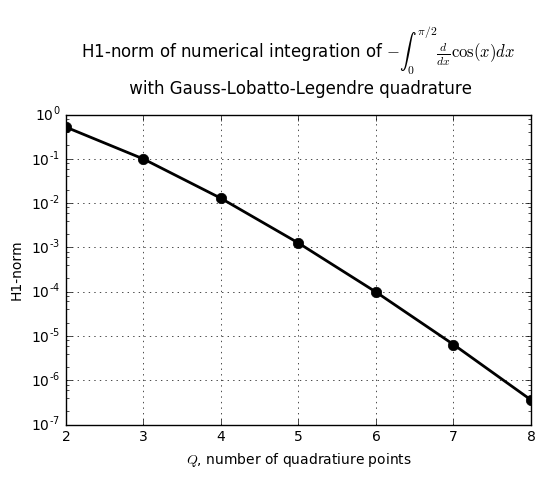

In [16]:
pyplot.semilogy(Q, err, 'k.-', lw=2, markersize=15)
pyplot.title("H1-norm of numerical integration of " +
             r"$-\int_{0}^{\pi/2}\frac{d}{dx}\cos{(x)} dx$" + 
             "\n with Gauss-Lobatto-Legendre quadrature", y=1.08)
pyplot.xlabel(r"$Q$" + ", number of quadratiure points")
pyplot.ylabel("H1-norm")
pyplot.grid();